In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from functools import lru_cache, partial
import math
from collections import namedtuple
from tqdm.auto import tqdm, trange
Point = namedtuple("Point", ['x', 'y'])

ls = os.listdir
join = os.path.join

In [51]:
@lru_cache(256)
def distance(point1, point2):
    return math.sqrt((point1.x - point2.x)**2 + (point1.y - point2.y)**2)

def view_tsp(solution, points, figsize = (8,8)):
    '''
    List of points
    '''
    plt.figure(figsize=figsize)
    xy = [[points[i].x, points[i].y] for i in solution]
    xy = np.array(xy)
    x = xy[:,0]
    y = xy[:,1]
    plt.plot(x,y,'ok-')
    plt.plot(x[0],y[0],'sr',markersize=12)
    plt.plot(x[-1],y[-1],'*g',markersize=16)
    for i, (xi,yi) in enumerate(xy):
        plt.text(xi+.01,yi+.01,i,fontdict={'fontsize':16,'color':'darkblue'})
        
def to_nearest(points):
    path = []
    remaining = list(range(len(points)))
    path.append(remaining.pop(0))
    while len(remaining)>0:
        dists = [distance(points[i],points[path[-1]]) for i in remaining]
        next_i = np.argmin(dists)
        path.append(remaining.pop(next_i))
        
    return path
            
def loss(sol,points):
    dist = distance(points[sol[-1]],points[sol[0]])
    for i in range(1,len(sol)):
        dist += distance(points[sol[i-1]],points[sol[i]])
        
    return dist

In [13]:
ls('./data')

['tsp_1000_1',
 'tsp_100_1',
 'tsp_100_2',
 'tsp_100_3',
 'tsp_100_4',
 'tsp_100_5',
 'tsp_100_6',
 'tsp_101_1',
 'tsp_105_1',
 'tsp_1060_1',
 'tsp_107_1',
 'tsp_1084_1',
 'tsp_1173_1',
 'tsp_11849_1',
 'tsp_124_1',
 'tsp_127_1',
 'tsp_1291_1',
 'tsp_1304_1',
 'tsp_1323_1',
 'tsp_136_1',
 'tsp_1379_1',
 'tsp_1400_1',
 'tsp_14051_1',
 'tsp_1432_1',
 'tsp_144_1',
 'tsp_150_1',
 'tsp_150_2',
 'tsp_152_1',
 'tsp_1577_1',
 'tsp_159_1',
 'tsp_1655_1',
 'tsp_1748_1',
 'tsp_1817_1',
 'tsp_18512_1',
 'tsp_1889_1',
 'tsp_195_1',
 'tsp_198_1',
 'tsp_200_1',
 'tsp_200_2',
 'tsp_2103_1',
 'tsp_2152_1',
 'tsp_225_1',
 'tsp_226_1',
 'tsp_2319_1',
 'tsp_2392_1',
 'tsp_262_1',
 'tsp_264_1',
 'tsp_299_1',
 'tsp_3038_1',
 'tsp_318_1',
 'tsp_318_2',
 'tsp_33810_1',
 'tsp_3795_1',
 'tsp_400_1',
 'tsp_417_1',
 'tsp_439_1',
 'tsp_442_1',
 'tsp_4461_1',
 'tsp_493_1',
 'tsp_51_1',
 'tsp_574_1',
 'tsp_575_1',
 'tsp_5915_1',
 'tsp_5934_1',
 'tsp_5_1',
 'tsp_654_1',
 'tsp_657_1',
 'tsp_70_1',
 'tsp_724_1',
 'tsp_

In [97]:
with open(join('./data/','tsp_70_1')) as fp:
    content = fp.read().split('\n')


In [98]:
nodeCount = int(content[0])
points = []
for i in range(1, nodeCount+1):
    line = content[i]
    parts = line.split()
    points.append(Point(float(parts[0]), float(parts[1])))

[0, 35, 57, 11, 50, 1, 22, 14, 44, 16, 24, 46, 55, 68, 67, 18, 26, 12, 31, 20, 29, 15, 45, 28, 39, 17, 30, 27, 56, 23, 2, 33, 65, 47, 63, 34, 69, 21, 49, 58, 36, 41, 66, 37, 42, 62, 60, 13, 19, 53, 38, 52, 6, 40, 5, 7, 51, 43, 4, 25, 3, 9, 59, 10, 61, 32, 8, 64, 54, 48]
806.124641709815


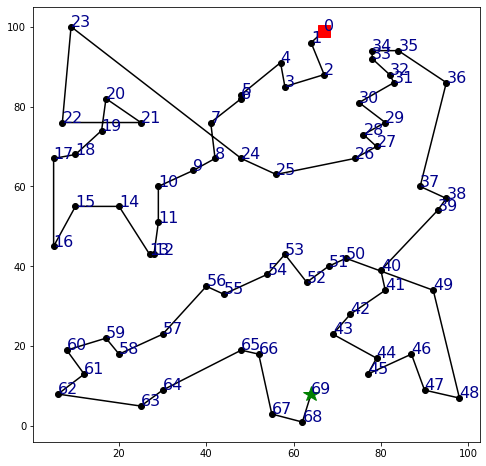

In [101]:
sol=to_nearest(points)
print(sol)
print(loss(sol,points))
view_tsp(sol)

In [104]:
with open('./prob_6_nearest.sol') as fp:
    c = fp.read()

In [105]:
c

'78478867.03 0\n0 8 7 6 5 15 14 13 4 33805 33795 33785 33776 33767 33757 33747 33738 33729 33719 33709 33700 33691 33681 33671 33662 33653 33643 33633 33624 33616 33608 33600 33592 33584 33575 33566 33558 33550 33541 33531 33522 33513 33503 33493 33484 33475 33465 33455 33446 33437 33427 33417 33408 33399 33389 33379 33370 33363 33355 33345 33336 33327 33317 33309 33301 33293 33284 33275 33267 33259 33250 33240 33231 33224 33214 33205 33197 33191 32624 33183 33173 33163 33153 33143 33134 33124 33115 33105 33095 33085 33075 33066 33056 33047 33040 33029 33019 33010 33001 32991 32981 32972 32962 32952 32941 32931 32921 32911 32903 32895 32885 32875 32865 32855 32846 32840 32833 32823 32816 32809 32802 32795 32794 32587 32586 32793 32792 32791 32790 32784 32421 32779 32769 32770 32771 32582 32772 32773 32774 32775 32780 32785 32786 32781 32583 32776 32581 32777 32778 32783 32782 32787 32585 32797 32798 32788 1255 32806 32805 32804 32803 32796 32584 32811 32810 32817 32818 32819 32812 3281

# SK OPT

In [14]:
with open(join('./data/','tsp_70_1')) as fp:
    content = fp.read().split('\n')


In [17]:
node_count = int(content[0])
points = []
for i in range(1, nodeCount + 1):
    line = content[i]
    parts = line.split()
    points.append(Point(float(parts[0]), float(parts[1])))

print(f'#Nodes: {node_count}')

#Nodes: 70


In [22]:
evaluate = partial(loss,points=points)

In [38]:
from sko import GA

In [44]:
optim = GA.GA_TSP(
    evaluate,
    node_count,
    size_pop=200,
    max_iter=1000,
)

In [45]:
solution, value = optim.run()

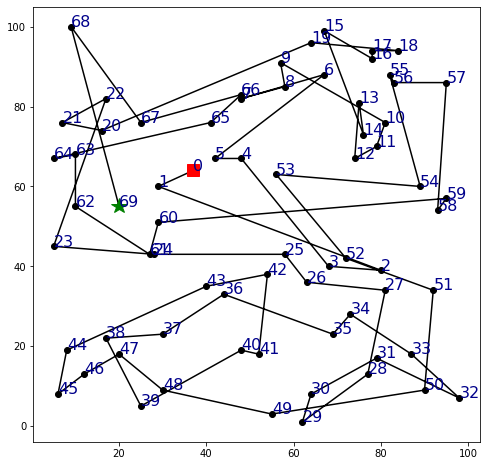

In [46]:
view_tsp(solution)

# 2-opt

In [156]:
with open(join('./data/','tsp_76_1')) as fp:
    content = fp.read().split('\n')


In [157]:
node_count = int(content[0])
points = []
for i in range(1, nodeCount + 1):
    line = content[i]
    parts = line.split()
    points.append(Point(float(parts[0]), float(parts[1])))

print(f'#Nodes: {node_count}')

#Nodes: 76


In [158]:
evaluate = partial(loss,points=points)

In [173]:
def cost_change(n1, n2, n3, n4):
    return (distance(n1, n3) + 
            distance(n2, n4) - 
            distance(n1, n2) -
            distance(n4, n3))


def two_opt(route,points,max_iter = 1000):
    best = route.copy()
    improved = True
    counter = 0
#     pbar = trange(max_iter)
    while improved and counter<max_iter:
        counter += 1
        value = evaluate(route)
        print(f'#{counter:04.0f} \t{value}',flush = True)
        improved = False
        for i in range(1, len(route) - 2):
                
            for j in range(i + 1, len(route)):
                if j - i == 1: continue
                if cost_change(
                        points[best[i - 1]],
                        points[best[i]],
                        points[best[j - 1]],
                        points[best[j]],
                ) < 0:
                    best[i:j] = best[j - 1:i - 1:-1]
                    improved = True
        route = best
    return best

In [165]:
# Initial solution using greedy
sol=to_nearest(points)
evaluate(sol)

663.9128870389574

In [166]:
from collections import deque

In [167]:
sol2 = two_opt(sol)

#0001 	663.9128870389574
#0002 	604.1017132364877
#0003 	581.9961795816123


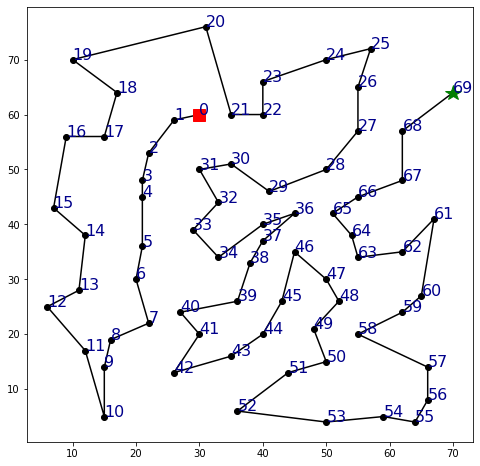

In [168]:
view_tsp(sol2)

# CP

In [4]:
with open(join('./data/','tsp_70_1')) as fp:
    content = fp.read().split('\n')


In [6]:
node_count = int(content[0])
points = []
for i in range(1, node_count + 1):
    line = content[i]
    parts = line.split()
    points.append(Point(float(parts[0]), float(parts[1])))

print(f'#Nodes: {node_count}')

#Nodes: 70


In [7]:
from ortools.sat.python import cp_model

In [11]:
model = cp_model.CpModel()

In [12]:
a = [] # whether i and j are connected
u = [] # order of oints
for i in range(node_count):
    row = [model.NewIntVar(0,1,f'a_{i}_{j}') for j in range(node_count)]
    a.append(row)
u = [model.NewIntVar(1,node_count-1,f'u_{i}') for i in range(node_count)]

In [13]:
# Add Constraints
for i in range(node_count):
    model.Add(a[i][i] == 0)
    model.Add(sum([ a[i][j] for j in range(node_count)])==1)
    model.Add(sum([ a[j][i] for j in range(node_count)])==1)
    
# model.AddAllDifferent(u)

for i in range(node_count):
    for j in range(node_count):
        if i==j: continue
        model.Add(u[i]-u[j]+node_count*a[i][j]<=node_count-1)
model.Add(u[0]==0)
# model.Add(u[-1]==node_count)

In [14]:
# Objective
obj = []
for i in range(node_count):
    for j in range(node_count):
        d = distance(points[i],points[j])
        obj.append(int(d)*a[i][j])
model.Minimize(sum(obj))

In [15]:
solver = cp_model.CpSolver()
solver.parameters.max_time_in_seconds = 10.0
status = solver.Solve(model)

In [16]:
status == cp_model.OPTIMAL

False

In [17]:
solver.Value(u)

TypeError: Cannot interpret [u_0(1..69), u_1(1..69), u_2(1..69), u_3(1..69), u_4(1..69), u_5(1..69), u_6(1..69), u_7(1..69), u_8(1..69), u_9(1..69), u_10(1..69), u_11(1..69), u_12(1..69), u_13(1..69), u_14(1..69), u_15(1..69), u_16(1..69), u_17(1..69), u_18(1..69), u_19(1..69), u_20(1..69), u_21(1..69), u_22(1..69), u_23(1..69), u_24(1..69), u_25(1..69), u_26(1..69), u_27(1..69), u_28(1..69), u_29(1..69), u_30(1..69), u_31(1..69), u_32(1..69), u_33(1..69), u_34(1..69), u_35(1..69), u_36(1..69), u_37(1..69), u_38(1..69), u_39(1..69), u_40(1..69), u_41(1..69), u_42(1..69), u_43(1..69), u_44(1..69), u_45(1..69), u_46(1..69), u_47(1..69), u_48(1..69), u_49(1..69), u_50(1..69), u_51(1..69), u_52(1..69), u_53(1..69), u_54(1..69), u_55(1..69), u_56(1..69), u_57(1..69), u_58(1..69), u_59(1..69), u_60(1..69), u_61(1..69), u_62(1..69), u_63(1..69), u_64(1..69), u_65(1..69), u_66(1..69), u_67(1..69), u_68(1..69), u_69(1..69)] as a linear expression.

# Randomized Opt-2

In [175]:
np.random.permutation(12)

array([ 2,  0,  5,  9,  1, 11,  4,  8,  7,  6,  3, 10])

In [191]:
def randomized_opt2(points,restarts = 1):
    if restarts>1:
        solutions = []
        values = []
        for i in range(restarts):
            print(f'<<< Attempt {i+1}/{restarts}>>>')
            solution = randomized_opt2(points)
            value = loss(solution,points)
            solutions.append(solution)
            values.append(value)
        idx = np.argmin(values)
        return solutions[idx]
    else:
        trial1 = np.random.permutation(len(points))
        np.random.shuffle(trial1)
        solution = two_opt(trial1,points)
        trial2 = deque(solution)
        trial2.rotate(3)
        return two_opt(list(trial2),points)

In [194]:
res = randomized_opt2(points,10)

<<< Attempt 1/10>>>
#0001 	2426.4538435986424
#0002 	818.3901689304282
#0003 	633.7244551270738
#0004 	594.2899666692083
#0005 	593.4844417059912
#0001 	593.4844417059912
#0002 	556.4790461867753
#0003 	556.4637064649107
<<< Attempt 2/10>>>
#0001 	2300.1823901781795
#0002 	763.3075407666126
#0003 	591.3046868301706
#0004 	569.4607267637766
#0005 	568.3845129904728
#0006 	565.6931186028605
#0001 	565.6931186028607
#0002 	565.1208280157773
<<< Attempt 3/10>>>
#0001 	2457.6338127777603
#0002 	720.5787300069944
#0003 	631.2935500976675
#0004 	586.6487736390486
#0005 	582.4422463027072
#0001 	582.4422463027073
#0002 	568.5130219770506
#0003 	568.040836581226
#0004 	568.0203550569792
#0005 	561.053970251728
<<< Attempt 4/10>>>
#0001 	2378.614802169817
#0002 	751.6926066710616
#0003 	644.8225625537841
#0004 	615.3676848309233
#0005 	606.8942120864522
#0006 	603.1148206299547
#0001 	603.1148206299547
#0002 	587.7743522824306
#0003 	571.1847785972349
#0004 	571.1627795305491
<<< Attempt 5/10>>>

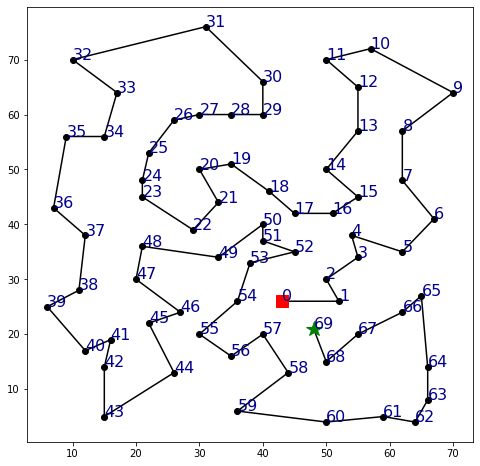

In [190]:
view_tsp(res)

# OR-tool routing solver

In [18]:
import math
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

In [69]:
def create_data_model(points):
    """Stores the data for the problem."""
    data = {}
    data['locations'] = points
    data['num_vehicles'] = 1
    data['depot'] = 0
    return data


def compute_euclidean_distance_matrix(locations):
    """Creates callback to return distance between points."""
    distances = {}
    for from_counter, from_node in enumerate(locations):
        distances[from_counter] = {}
        for to_counter, to_node in enumerate(locations):
            if from_counter == to_counter:
                distances[from_counter][to_counter] = 0
            else:
                # Euclidean distance
                distances[from_counter][to_counter] = (int(
                    math.hypot((from_node[0] - to_node[0]),
                               (from_node[1] - to_node[1]))))
    return distances


def print_solution(manager, routing, solution):
    """Prints solution on console."""
    print('Objective: {}'.format(solution.ObjectiveValue()))
    index = routing.Start(0)
    plan_output = 'Route:\n'
    route_distance = 0
    while not routing.IsEnd(index):
        plan_output += ' {} ->'.format(manager.IndexToNode(index))
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += ' {}\n'.format(manager.IndexToNode(index))
    print(plan_output)
    plan_output += 'Objective: {}m\n'.format(route_distance)
    return plan_output


In [87]:
def get_route(manager, routing, solution):
    route=[]
    route =[ routing.Start(0)]
    while not routing.IsEnd(route[-1]):
        index = route[-1]
        new_index = solution.Value(routing.NextVar(index))
        route.append(new_index)
    route.pop(-1)
    return route

def main(points = None):
    """Entry point of the program."""
    # Instantiate the data problem.
    data = create_data_model(locations = points)

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['locations']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)

    distance_matrix = compute_euclidean_distance_matrix(data['locations'])

    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return distance_matrix[from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
#         out = print_solution(manager, routing, solution)
        out = get_route(manager, routing, solution)
        
    return out
        



In [88]:
o = main(points)

In [92]:
o

[0,
 57,
 11,
 22,
 1,
 14,
 16,
 44,
 39,
 17,
 30,
 27,
 56,
 23,
 2,
 33,
 65,
 47,
 63,
 34,
 69,
 21,
 49,
 58,
 53,
 19,
 13,
 60,
 42,
 62,
 37,
 66,
 41,
 36,
 38,
 52,
 6,
 40,
 5,
 7,
 51,
 32,
 8,
 48,
 54,
 64,
 61,
 10,
 59,
 9,
 3,
 25,
 4,
 43,
 55,
 68,
 46,
 24,
 67,
 26,
 18,
 12,
 31,
 45,
 20,
 15,
 29,
 28,
 50,
 35]

In [91]:
loss(o,points)

714.2072130080118

In [59]:
with open(join('./data/','tsp_70_1')) as fp:
    content = fp.read().split('\n')


In [60]:
node_count = int(content[0])
points = []
for i in range(1, node_count + 1):
    line = content[i]
    parts = line.split()
    points.append(Point(float(parts[0]), float(parts[1])))

print(f'#Nodes: {node_count}')

#Nodes: 70


In [63]:
manager = pywrapcp.RoutingIndexManager(node_count, 1, 0)
routing = pywrapcp.RoutingModel(manager)
distance_callback = lambda i,j: distance(points[i],points[j])
transit_callback_index = routing.RegisterTransitCallback(distance_callback)
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

search_parameters = pywrapcp.DefaultRoutingSearchParameters()
# search_parameters.first_solution_strategy = (
#     routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)
search_parameters.local_search_metaheuristic = (
    routing_enums_pb2.LocalSearchMetaheuristic.GUIDED_LOCAL_SEARCH)
search_parameters.time_limit.seconds = 30
search_parameters.log_search = True

solution = routing.SolveWithParameters(search_parameters)

In [64]:
if solution:
    out=print_solution(manager, routing, solution)

Objective: 0
Route:
 0 -> 69 -> 68 -> 67 -> 66 -> 65 -> 64 -> 63 -> 62 -> 61 -> 60 -> 59 -> 58 -> 57 -> 56 -> 55 -> 54 -> 53 -> 52 -> 51 -> 50 -> 49 -> 48 -> 47 -> 46 -> 45 -> 44 -> 43 -> 42 -> 41 -> 40 -> 39 -> 38 -> 37 -> 36 -> 35 -> 34 -> 33 -> 32 -> 31 -> 30 -> 29 -> 28 -> 27 -> 26 -> 25 -> 24 -> 23 -> 22 -> 21 -> 20 -> 19 -> 18 -> 17 -> 16 -> 15 -> 14 -> 13 -> 12 -> 11 -> 10 -> 9 -> 8 -> 7 -> 6 -> 5 -> 4 -> 3 -> 2 -> 1 -> 0



In [48]:
route=get_route(manager, routing, solution)

In [49]:
route

[0,
 69,
 68,
 67,
 66,
 65,
 64,
 63,
 62,
 61,
 60,
 59,
 58,
 57,
 56,
 55,
 54,
 53,
 52,
 51,
 50,
 49,
 48,
 47,
 46,
 45,
 44,
 43,
 42,
 41,
 40,
 39,
 38,
 37,
 36,
 35,
 34,
 33,
 32,
 31,
 30,
 29,
 28,
 27,
 26,
 25,
 24,
 23,
 22,
 21,
 20,
 19,
 18,
 17,
 16,
 15,
 14,
 13,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 2,
 1,
 70]

In [57]:
route[-1]=0


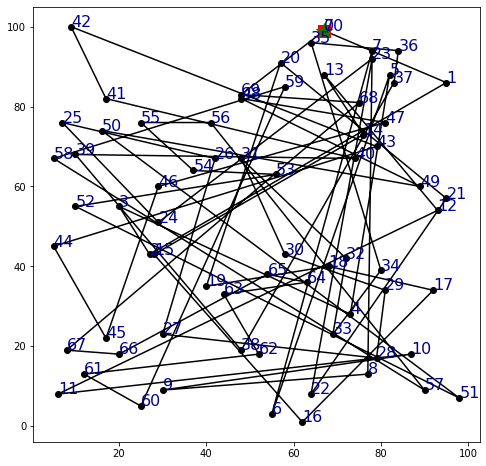

In [58]:
view_tsp(route,points)

In [53]:
%debug

> <ipython-input-51-0df8dc720d52>(10)<listcomp>()
      8     '''
      9     plt.figure(figsize=figsize)
---> 10     xy = [[points[i].x, points[i].y] for i in solution]
     11     xy = np.array(xy)
     12     x = xy[:,0]

ipdb> p i 
70
ipdb> q


In [29]:
solution.ObjectiveValue()

0

In [46]:
solution

<ortools.constraint_solver.pywrapcp.Assignment; proxy of <Swig Object of type 'operations_research::Assignment *' at 0x000001D0ABB130C0> >